### Get gene symbol to run DAVID pipline

In [12]:
import pandas as pd

species = 'mouse'

# Read the essential gene predictions
prediction_ess = pd.read_csv(f"../../results/{species}/{species}_essential_genes_union.csv")

# Filter out rows where 'symbol' is '-'
prediction_ess = prediction_ess[prediction_ess['symbol'] != '-']

# Apply the process_quoted_strings function to each row in the 'symbol' column
def process_quoted_strings(row):
    if isinstance(row, str) and row.startswith('"'):
        # Remove the quotes and split by comma
        row = row[1:-1]
        return row.split(',')
    else:
        return [row]

# Process and explode the 'symbol' column
ess_symbol = prediction_ess['symbol'].apply(process_quoted_strings).explode().reset_index(drop=True)

# Convert the set to a DataFrame
ess_symbol_df = pd.DataFrame(list(ess_symbol), columns=['symbol'])

# Save the final union of essential gene symbols to a file
ess_symbol_df.to_csv(f"ess_symbol_{species}.txt", index=False)

print("Union of essential gene symbols saved successfully.")


Union of essential gene symbols saved successfully.


In [13]:
import pandas as pd

species = 'mouse'

# Read the essential gene predictions
all_lnc = pd.read_csv(f"../../data/LPI/{species}/lncRNA.csv")

# Filter out rows where 'symbol' is '-'
all_lnc = all_lnc[all_lnc['symbol'] != '-']

# Apply the process_quoted_strings function to each row in the 'symbol' column
def process_quoted_strings(row):
    if isinstance(row, str) and row.startswith('"'):
        # Remove the quotes and split by comma
        row = row[1:-1]
        return row.split(',')
    else:
        return [row]

# Process and explode the 'symbol' column
symbol = all_lnc['symbol'].apply(process_quoted_strings).explode().reset_index(drop=True)

# Convert the set to a DataFrame
symbol_df = pd.DataFrame(list(symbol), columns=['symbol'])

# Save the final union of essential gene symbols to a file
symbol_df.to_csv(f"symbol_{species}.txt", index=False)

print("Union of gene symbols saved successfully.")


Union of gene symbols saved successfully.


### Statistic results of  Go Term(BP,CC,MF)

In [2]:
import pandas as pd

species = 'human'

# Read the file
file_path = f'chart_{species}.txt'  
df = pd.read_csv(file_path, sep='\t')  
df = df[['Category', 'Term', 'Count', '%', 'PValue', 'Fold Enrichment', 'Bonferroni', 'Benjamini', 'FDR']]

# Filter for GO terms
go_term = ['GOTERM_BP_DIRECT', 'GOTERM_CC_DIRECT', 'GOTERM_MF_DIRECT']
df = df[df['Category'].isin(go_term)]

# Extract different types of GO terms and sort by Count in descending order
df_bp = df[df['Category'] == 'GOTERM_BP_DIRECT'].sort_values(by='%', ascending=False)
df_cc = df[df['Category'] == 'GOTERM_CC_DIRECT'].sort_values(by='%', ascending=False)
df_mf = df[df['Category'] == 'GOTERM_MF_DIRECT'].sort_values(by='%', ascending=False)

# Save each to separate files
df_bp.to_csv(f'GOTERM_BP_{species}.csv', index=False)
df_cc.to_csv(f'GOTERM_CC_{species}.csv', index=False)
df_mf.to_csv(f'GOTERM_MF_{species}.csv', index=False)


### Draw bar plot.

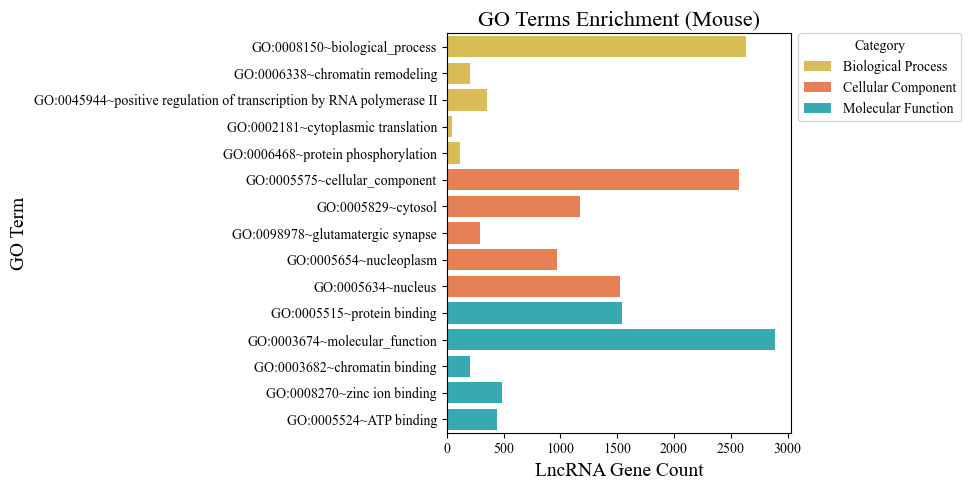

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'


# File paths for Biological Process (BP), Cellular Component (CC), and Molecular Function (MF)
bp_file = 'GOTERM_BP_mouse.csv' 
cc_file = 'GOTERM_CC_mouse.csv'  
mf_file = 'GOTERM_MF_mouse.csv'  

# Read the three files into separate DataFrames
bp_df = pd.read_csv(bp_file)
cc_df = pd.read_csv(cc_file)
mf_df = pd.read_csv(mf_file)

# Add a 'Category' column to each DataFrame for identification
bp_df['Category'] = 'Biological Process'
cc_df['Category'] = 'Cellular Component'
mf_df['Category'] = 'Molecular Function'

# Combine all three dataframes into one
df = pd.concat([bp_df, cc_df, mf_df], ignore_index=True)

# Filter out rows with FDR >= 0.05 (non-significant GO terms)
significant_df = df[df['FDR'] < 0.05]
significant_df = significant_df[significant_df['Fold Enrichment'] > 1]

# For each category, get the top 5 GO terms by sorting based on p-value
top_bp = significant_df[significant_df['Category'] == 'Biological Process'].sort_values('PValue').head(5)
top_cc = significant_df[significant_df['Category'] == 'Cellular Component'].sort_values('PValue').head(5)
top_mf = significant_df[significant_df['Category'] == 'Molecular Function'].sort_values('PValue').head(5)

# Combine the top 5 GO terms from each category
top_terms_df = pd.concat([top_bp, top_cc, top_mf], ignore_index=True)

# Set up the color palette for different categories
palette = {"Biological Process": "#EECA40", 
           "Cellular Component": "#FD763F", 
           "Molecular Function": "#23BAC5"}

# Create the barplot
plt.figure(figsize=(10, 5))
sns.barplot(x='Count', y='Term', hue='Category', data=top_terms_df, palette=palette)

# Set title and labels
plt.title("GO Terms Enrichment (Mouse)", fontsize=16)
plt.xlabel("LncRNA Gene Count", fontsize=14)
plt.ylabel("GO Term", fontsize=14)

# Move the legend outside the plot
plt.legend(
    title='Category', 
    bbox_to_anchor=(1.02, 1), 
    loc='upper left', 
    borderaxespad=0
)

# Adjust layout to prevent clipping
plt.tight_layout(rect=[0, 0, 0.99, 1])

# Save the plot
plt.savefig('go_terms_enrichment_mouse.svg', dpi=300)

# Show the plot
plt.show()
